In [1]:
from download import download

In [2]:
download("https://www.dropbox.com/s/trkbcixqut2jmtk/context_data_norm.parquet?dl=1", "ams_patterned_norm.pq")

Successfully downloaded file to ams_patterned_norm.pq


'ams_patterned_norm.pq'

In [5]:
from sklearn.mixture import GaussianMixture
import pandas

In [6]:
data = pandas.read_parquet('ams_patterned_norm.pq')

In [9]:
data = data.drop(columns="cluster")

In [10]:
data

,stcOri_meanIQ3,stcOri_rangeIQ3,stcOri_theilID3,sdcLAL_meanIQ3,sdcLAL_rangeIQ3,sdcLAL_theilID3,sdcAre_meanIQ3,sdcAre_rangeIQ3,sdcAre_theilID3,sscCCo_meanIQ3,...,ldsCDL_simpson,xcnSCl_simpson,mtdMDi_simpson,lddNDe_simpson,linWID_simpson,lddRea_simpson,lddARe_simpson,sddAre_simpson,midRea_simpson,midAre_simpson
uID,,,,,,,,,,,,,,,,,,,,,
0,0.585140,-0.896398,-0.489475,7.133090,-1.091901,-1.057916,16.668079,-0.238053,-1.152259,6.014979,...,1.264823,1.435612,2.483693,1.947502,1.867760,2.218971,1.541849,1.403983,2.810304,1.613008
1,0.585140,-0.896398,-0.489475,7.133090,-1.091901,-1.057916,16.668079,-0.238053,-1.152259,6.014979,...,1.264823,1.435612,2.483693,1.947502,1.867760,2.218971,1.541849,1.403983,2.810304,1.613008
2,0.571235,1.201597,-0.115102,4.994748,1.363017,-0.756882,6.082546,2.874121,-0.867541,2.367613,...,-0.498478,1.435612,2.483693,1.947502,1.867760,0.237811,-0.275548,-0.457394,0.608711,-0.260924
3,0.943433,1.084128,-0.198643,2.919743,2.612026,1.364034,2.640811,3.506598,0.911405,2.538624,...,1.264823,1.435612,2.483693,1.947502,1.867760,2.218971,1.541849,1.403983,2.810304,1.613008
4,0.571235,1.201597,-0.115102,4.994748,1.363017,-0.756882,6.082546,2.874121,-0.867541,2.367613,...,-0.498478,1.435612,2.483693,1.947502,1.867760,0.237811,-0.275548,-0.457394,0.608711,-0.260924
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19452,1.431831,0.258860,-0.453472,1.422329,2.160767,1.044623,-0.034803,-0.196324,-0.227110,-0.932315,...,1.264823,-0.965272,0.605287,1.947502,1.867760,0.203535,-0.645944,-0.489598,2.213055,1.104647
19453,1.390788,0.275483,-0.452804,1.457578,2.238153,1.138601,0.064791,0.219800,0.579435,-0.182882,...,1.264823,-1.117181,0.893285,1.947502,1.867760,-0.056267,-0.858392,-0.733692,1.630388,1.074985
19454,1.737126,-0.577250,-0.471851,0.642903,2.346958,1.932596,-0.055894,0.166560,1.457609,-0.210482,...,-0.691058,-1.038957,-0.885990,1.761087,1.506825,-1.042921,-0.932765,-0.871893,-0.345487,-0.591430


In [ ]:
%%time
gmm = GaussianMixture(n_components=10, covariance_type="full", max_iter=300, n_init=100, random_state=42)
fitted = gmm.fit(data)

In [12]:
data['cluster'] = gmm.predict(data)

In [13]:
data.reset_index()[['cluster', 'uID']].to_csv('ams_cluster_labels_10.csv')

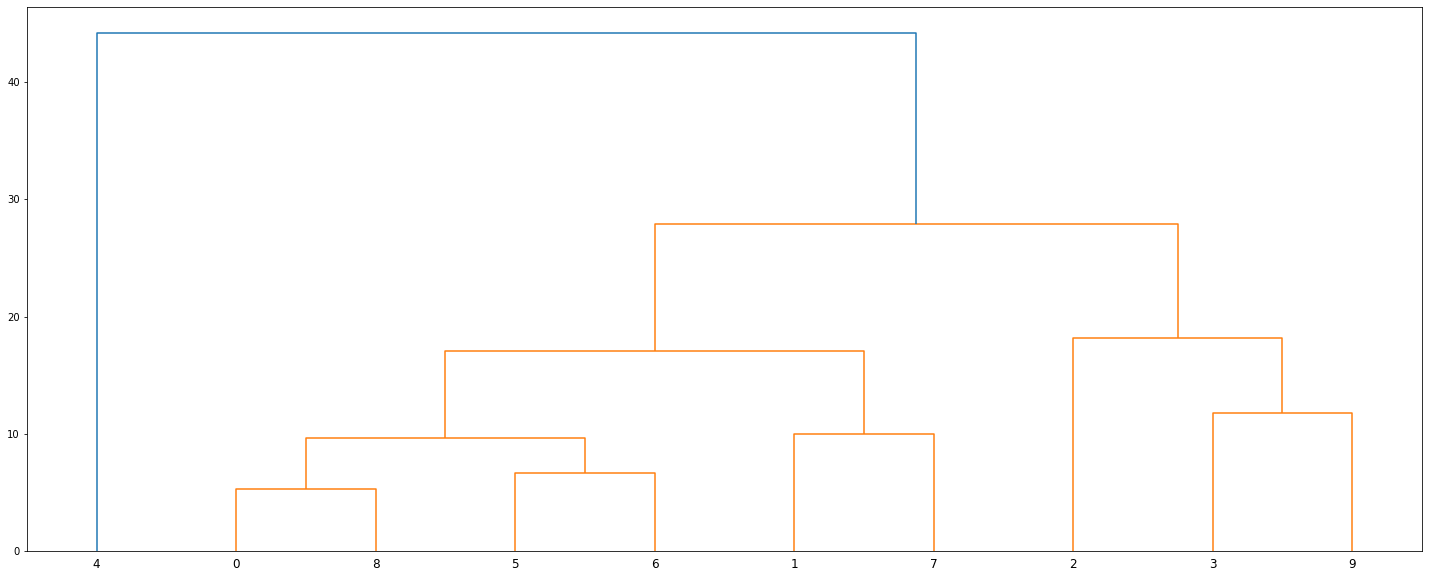

In [15]:
from scipy.cluster import hierarchy
import matplotlib.pyplot as plt



group = data.groupby('cluster').mean()
Z = hierarchy.linkage(group, 'ward')
plt.figure(figsize=(25, 10))
dn = hierarchy.dendrogram(Z, labels=group.index)
plt.savefig('ams_hierarchy.pdf')